In [ ]:
"""
    File : cumuprobaMicrodiversitySpatialFeaturesRandomSampling.ipynb
    Plot : cumulative probability distribution of normalised distance to tumour centre from microdiversity hotspots, based on random sampling
    Input : N/A
        This is a standalone script for generating plots
        Depending on the random seed, the actual plots may differ slightly but the power law
        scaling behaviours based on random samples follow the null expectataion (dashed lines).
"""

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sample_spots(
    sample_size = 10000,
    dimension = 2 # 1, 2, 3
):
    if dimension == 1:
        spots_in_segment = [
            np.array([x,0,0]) for x in
            np.random.uniform(-1,1,sample_size*2)
        ]
        distances_to_centre = [
            np.linalg.norm(spot) for spot in spots_in_segment
        ]
        spots_in_range = [
            spot.tolist()+[dist]
            for spot, dist in zip(
                spots_in_segment, distances_to_centre
            )
            if dist <= 1
        ]
        return spots_in_range 
    
    if dimension == 2:
        spots_in_square = [
            np.array([x,y,0]) for x,y in
            np.random.uniform(-1,1,sample_size*2*2).reshape(-1,2)
        ]
        distances_to_centre = [
            np.linalg.norm(spot) for spot in spots_in_square
        ]
        spots_in_circle = [
            spot.tolist()+[dist]
            for spot, dist in zip(
                spots_in_square, distances_to_centre
            )
            if dist <= 1
        ]
        assert len(spots_in_circle) > sample_size
        spots_in_circle = spots_in_circle[:sample_size]

        return spots_in_circle
    
    if dimension == 3:
        spots_in_cube = np.random.uniform(-1,1,sample_size*3*2).reshape(-1,3)
        distances_to_centre = [
            np.linalg.norm(spot) for spot in spots_in_cube
        ]
        spots_in_sphere = [
            spot.tolist()+[dist]
            for spot, dist in zip(
                spots_in_cube, distances_to_centre
            )
            if dist <= 1
        ]
        assert len(spots_in_sphere) > sample_size
        spots_in_sphere = spots_in_sphere[:sample_size]
        
        return spots_in_sphere

In [3]:
def config_ax(ax, xlim = [5e-3,1]):
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.set_xlim(xlim)

    ax.set_xlabel('Normalised distance to centre')
    ax.set_ylabel('Cumulative probability') 

    
def config_font_size(figsize):
    params = {'legend.fontsize': 6,
              'figure.figsize': figsize,
             'axes.labelsize': 8,
             'axes.titlesize': 8,
             'xtick.labelsize':6,
             'ytick.labelsize':6,
             'pdf.fonttype':42}
    plt.rcParams.update(params)
    
def plot_cumu_freq(
    data, 
    label, 
    ax, 
    color='grey',
    dimension = 2,
    save_path = ""
):
    xs = np.linspace(0,1,10000)
    
    if dim == 1:
        ys = [x for x in xs]
        ax.plot(xs,ys,ls='--', lw=0.5, c=color, label = "Null model (1D)")
    if dim == 2:
        ys = [x*x for x in xs]
        ax.plot(xs,ys,ls='--', lw=0.5, c=color, label = "Null model (2D)")
    if dim == 3:
        ys = [x*x*x for x in xs]
        ax.plot(xs,ys,ls='--', lw=0.5, c=color, label = "Null model (3D)")

    # Plot the random sampling model
    n_bins = 50
    n, bins, patches = ax.hist(
        data.distances, n_bins, density=True, histtype='step',
        cumulative=True, label=label, color = color, lw=1,
        range = (0,1)
    )
    
    return (n, bins, patches)

In [4]:
spots_1d = sample_spots(dimension=1)
spots_2d = sample_spots(dimension=2)
spots_3d = sample_spots(dimension=3)
df_spots_1d = pd.DataFrame(
    data = spots_1d, columns = ["x", "y", "z", "distances"]
)
df_spots_2d = pd.DataFrame(
    data = spots_2d, columns = ["x", "y", "z", "distances"]
)
df_spots_3d = pd.DataFrame(
    data = spots_3d, columns = ["x", "y", "z", "distances"]
)



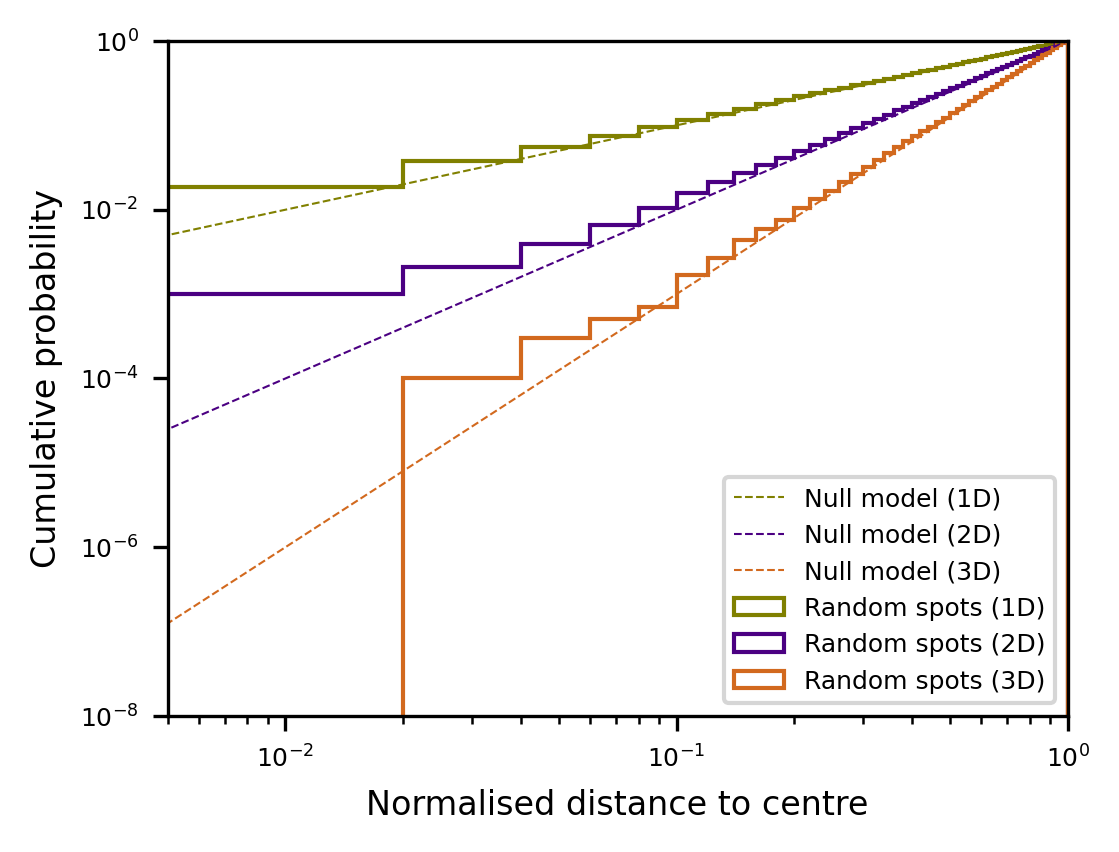

In [6]:
fig = plt.figure(dpi=300)
ax = fig.add_axes([0.2,0.2,0.75,0.75])

config_font_size(figsize = (4,3))
config_ax(ax)

for df_spots, dim, color in zip(
    [
        df_spots_1d, 
        df_spots_2d,
        df_spots_3d
    ],
    [1,2,3],
    ['olive', 'indigo', 'chocolate']
):
    plot_info = plot_cumu_freq(
        data=df_spots, 
        label=f"Random spots ({dim}D)", 
        ax = ax,
        dimension=dim,
        color=color
    )
    
ax.set_ylim([1e-8, 1])
    
plt.legend()
plt.show()

### save an example data frame

In [7]:
df_random_spots_1d_2d_3d = pd.DataFrame()

for df_spots, dim in zip(
    [
        df_spots_1d, 
        df_spots_2d,
        df_spots_3d
    ],
    [1,2,3]
):
    label=f"Random spots ({dim}D)"
    df_random_spots = df_spots.copy()
    df_random_spots['label'] = label
    df_random_spots_1d_2d_3d = df_random_spots_1d_2d_3d.append(df_random_spots)

In [8]:
df_random_spots_1d_2d_3d.head()

,x,y,z,distances,label
0,0.443041,0.0,0.0,0.443041,Random spots (1D)
1,0.737340,0.0,0.0,0.737340,Random spots (1D)
2,-0.348645,0.0,0.0,0.348645,Random spots (1D)
3,0.699586,0.0,0.0,0.699586,Random spots (1D)
4,0.327257,0.0,0.0,0.327257,Random spots (1D)


In [9]:
df_random_spots_1d_2d_3d.to_csv(
    "../Source data for figures/Source_Data_Extended_Data_Figure_5/SourceData_ED_Fig5b/df_random_spots_1d_2d_3d.csv",
    index=False
)